In [5]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import torch.optim as optim
from torchinfo import summary

import sys
MODEL_PATH = r'C:\WorkSpace\KDT\TORCH_DL\day06'
sys.path.append(MODEL_PATH)
from utils import *

In [6]:
FILE_PATH = '../../../LocalData/cifar-10-batches-py/'
batch_list = []
for i in range(1, 6): # 1 ~ 5
    with open(FILE_PATH+f'data_batch_{i}', 'rb') as f:
        batch_list.append(pickle.load(f, encoding='bytes'))

In [7]:
with open(FILE_PATH+'test_batch', 'rb') as f:
    test_data = pickle.load(f, encoding='bytes')

In [8]:
batch_input_list = []
batch_target_list = []
for i in range(5):
    batch_input_list.append(batch_list[i][b'data'].reshape(-1,3,32,32))
    batch_target_list.append(batch_list[i][b'labels'])

In [9]:
train_input = np.concatenate(batch_input_list, axis=0)
train_output = np.concatenate(batch_target_list, axis=0)
train_input.shape, train_output.shape

((50000, 3, 32, 32), (50000,))

In [10]:
label_dict = {0 : 'airplane', 1 : 'automobile', 2 : 'bird', 3 : 'cat',
              4 : 'deer', 5 : 'dog', 6 : 'frog', 7 : 'horse', 8 : 'ship', 9 : 'truck'}

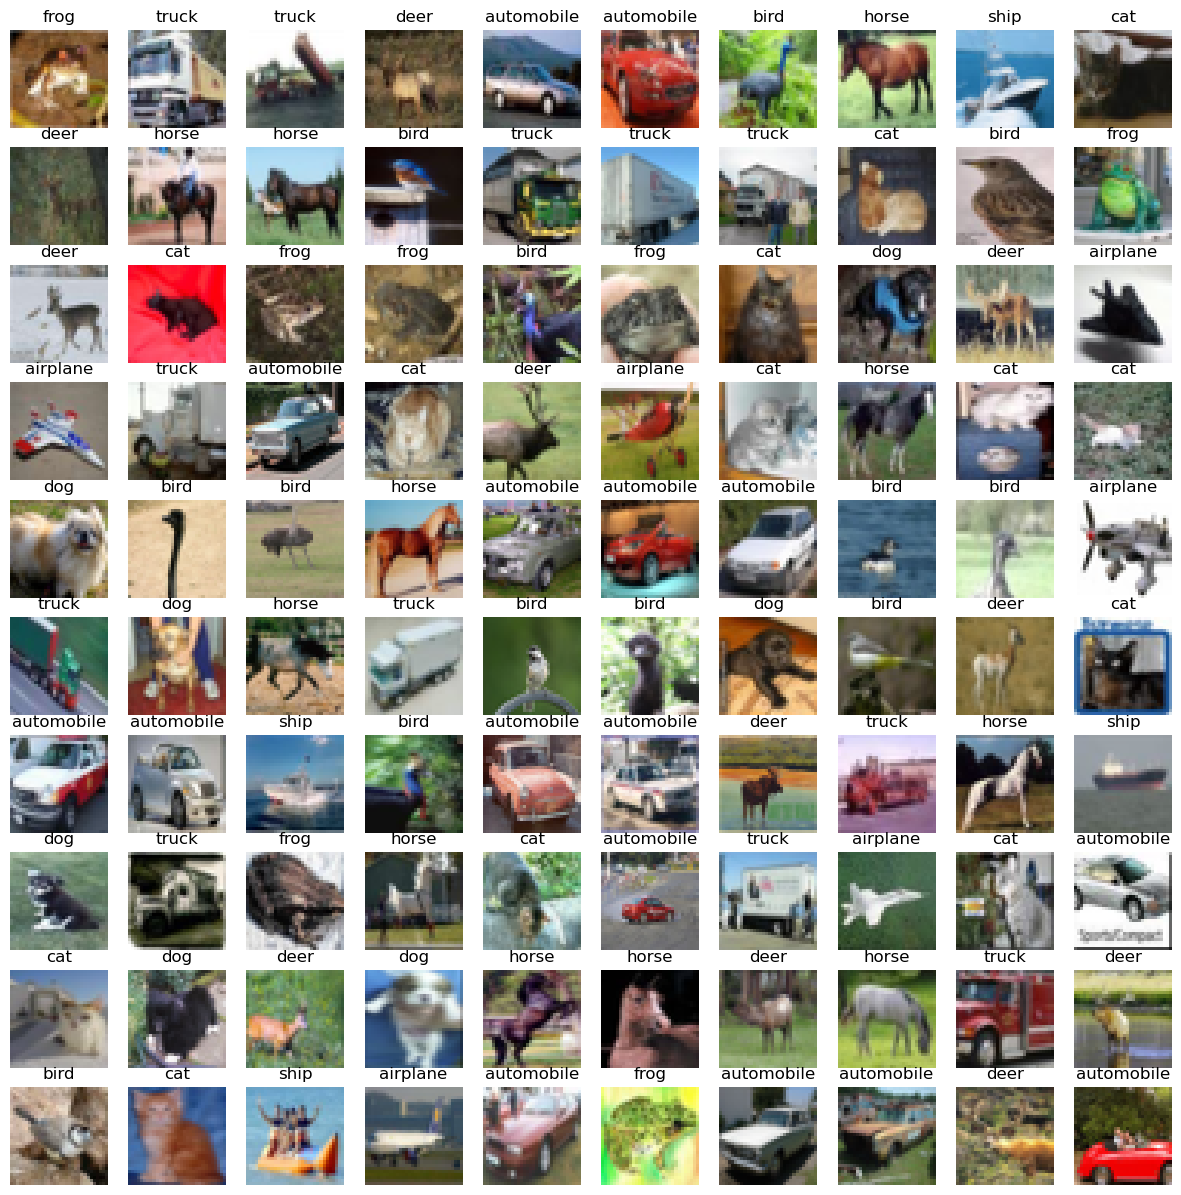

In [11]:
fig, axs = plt.subplots(10, 10, figsize = (15, 15))
for i in range(10):
    for j in range(10):
        axs[i][j].imshow(train_input[i*10+j].transpose(1,2,0))
        axs[i][j].set_title(label_dict[train_output[i*10+j]])
        axs[i][j].axis('off')
plt.show()

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(train_input, train_output,
                                                    stratify=train_output,
                                                    train_size=0.8, random_state=42)

X_test = test_data[b'data'].reshape(-1,3,32,32)
y_test = np.array(test_data[b'labels'])

print(f'[train] : {X_train.shape}, {y_train.shape}')
print(f'[valid] : {X_valid.shape}, {y_valid.shape}')
print(f'[test] : {X_test.shape}, {y_test.shape}')

[train] : (40000, 3, 32, 32), (40000,)
[valid] : (10000, 3, 32, 32), (10000,)
[test] : (10000, 3, 32, 32), (10000,)


In [13]:
isinstance(X_train, np.ndarray)

True

In [14]:
a = pd.DataFrame([[0,1,2,3]])
isinstance(a, pd.DataFrame)

True

In [15]:
trainDS = CustomDataset(X_train, y_train, feature_dim=1)
validDS = CustomDataset(X_valid, y_valid, feature_dim=1)

trainDL = DataLoader(trainDS, batch_size=64)
validDL = DataLoader(validDS, batch_size=64)

TypeError: __init__() got an unexpected keyword argument 'feature_dim'

In [26]:
model = CNNModel(input_cnn1=3,output_cnn1=200,output_cnn2=100,hidden_list=[100,50,20],
                 output_classes=10,kernel_size=3,padding1=1,padding2=0,dropout_prob=0,
                 image_height_size=32,image_width_size=32)

print(model)
print(summary(model, input_size=(32, 3, 32, 32)))

CNNModel(
  (layer1): Sequential(
    (0): Conv2d(3, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(200, 100, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (drop): Dropout(p=0, inplace=False)
  (fc1): Linear(in_features=4900, out_features=100, bias=True)
  (fc2_list): ModuleList(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=20, bias=True)
  )
  (fc3): Linear(in_features=20, out_features=10, bias=True)
)
Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                     

In [27]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [28]:
EPOCH = 30
SAVE_PATH = '../../../LocalData/models'
result = training(trainDL, validDL, model, model_type='multiclass',
                  optimizer=optimizer, epoch=EPOCH, endurance_cnt=10,
                  view_epoch=1, num_classes=10, SAVE_PATH=SAVE_PATH)

[EPOCH] : 1에서 모델 저장 완료.
[Loss : 1/30] Train : 1.4113, Test : 1.1620
[Score  : 1/30] Train : 0.4872, Test : 0.5942
[EPOCH] : 2에서 모델 저장 완료.
[Loss : 2/30] Train : 1.0333, Test : 0.9588
[Score  : 2/30] Train : 0.6349, Test : 0.6594
[EPOCH] : 3에서 모델 저장 완료.
[Loss : 3/30] Train : 0.8670, Test : 0.9529
[Score  : 3/30] Train : 0.6966, Test : 0.6650
[EPOCH] : 4에서 모델 저장 완료.
[Loss : 4/30] Train : 0.7458, Test : 0.8642
[Score  : 4/30] Train : 0.7392, Test : 0.7037
[Loss : 5/30] Train : 0.6520, Test : 0.8854
[Score  : 5/30] Train : 0.7728, Test : 0.7111
[Loss : 6/30] Train : 0.5763, Test : 1.0042
[Score  : 6/30] Train : 0.7994, Test : 0.6797
[Loss : 7/30] Train : 0.4993, Test : 1.0507
[Score  : 7/30] Train : 0.8257, Test : 0.6964
[Loss : 8/30] Train : 0.4249, Test : 1.1298
[Score  : 8/30] Train : 0.8513, Test : 0.7020
[Loss : 9/30] Train : 0.3801, Test : 1.2023
[Score  : 9/30] Train : 0.8687, Test : 0.6904
[Loss : 10/30] Train : 0.3397, Test : 1.2617
[Score  : 10/30] Train : 0.8804, Test : 0.6963
[L

In [30]:
result

([1.4113103043556214,
  1.0333405850410462,
  0.867037830543518,
  0.74584506649971,
  0.6519918452262878,
  0.5763497512817383,
  0.4993255506515503,
  0.4248843527317047,
  0.3801092728614807,
  0.3397071262359619,
  0.30520033997297286,
  0.24696608560681343,
  0.22548003261983396,
  0.20077885571718215],
 [1.1619762398634748,
  0.9587765791613585,
  0.9529346406080161,
  0.8641898039799587,
  0.885419659174172,
  1.0042224230280348,
  1.0506755009198645,
  1.1297966192482383,
  1.2022849849075268,
  1.2616506794076057,
  1.3539536815540048,
  1.503084760182982,
  1.4962129684010887,
  1.6838838366945839],
 [0.48715,
  0.634925,
  0.69665,
  0.739225,
  0.77275,
  0.799375,
  0.8257,
  0.851325,
  0.868725,
  0.880425,
  0.893275,
  0.9143,
  0.9209,
  0.929],
 [0.5942476114649682,
  0.6594347133757962,
  0.6650079617834395,
  0.7037221337579618,
  0.7110867834394905,
  0.6797372611464968,
  0.6963574840764332,
  0.70203025477707,
  0.6903861464968153,
  0.6962579617834395,
  0.6806

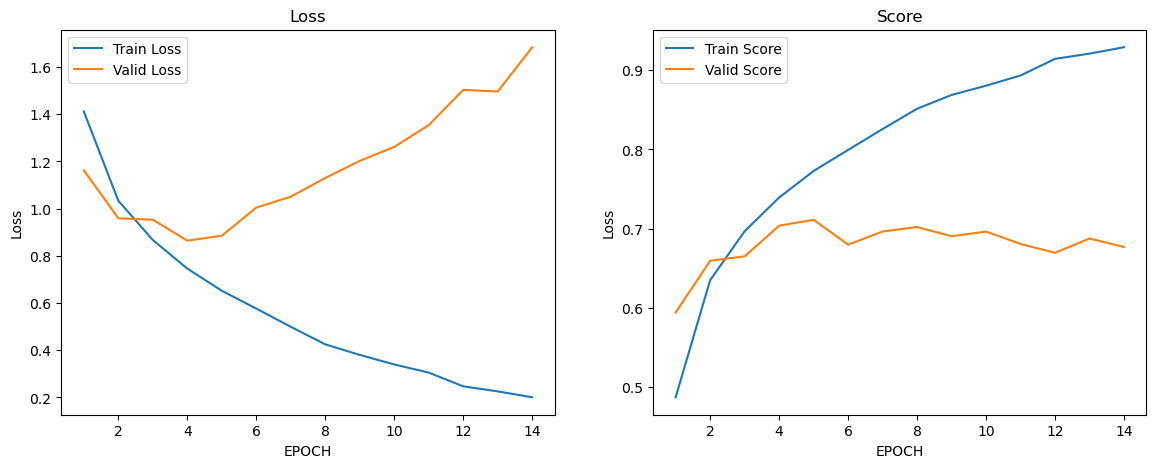

In [32]:
DrawPlot(result)
plt.show()